# Challenge 2

In this challenge we will continue working with the `Pokemon` dataset. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.


## Problem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [2]:
# Import libraries
import numpy as np
import pandas as pd

In [3]:
# To make run all you ask in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Importing the dataset
pokemon = pd.read_csv('/Users/deshdeepak/lab-dataframe-calculations/your-code/Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [5]:
# your code here

#318	45	49	49	65	65	45
#looking at first row values to check if total is a sum of other columns.
Total = 45+49+49+65+65+45
Total
#total matches sum of these values

#creating a function to get true or false as row values to check if the hypothesis holds true for all rows
def sum_row_tot(row):
    if row['Total']==(row['HP']+row['Attack']+row['Defense']+row['Sp. Atk']+row['Sp. Def']+ row['Speed']):
        return True
    else:
        return False
    

318

In [6]:
pokemon['check_total']=pokemon.apply(sum_row_tot, axis =1)
pokemon.head(15)
#applying the above function and creating a new column to see true/false returns.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,check_total
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,True
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,True
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,True
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,True
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,True


In [7]:
check_type = pokemon['check_total'].unique()
check_type_list = list(check_type)
check_type_list

#creating a list of unique values in column in check_total to see if any False values appear

[True]

#### Our hypothesis was correct. Total is the sum of HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed.

## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

In [8]:
# applying one hot encoder to Type 1 and Type 2
#there are null values in Type 2, so first replacing it.

pokemon['Type 2'] = pokemon['Type 2'].replace('zero', 'NaN')
pokemon.isna().sum()
pokemon['Type 2'].fillna('zero', inplace= True)
#pokemon.isna().sum()
# Importing OneHot Encoder
from sklearn.preprocessing import OneHotEncoder

#                0
Name             0
Type 1           0
Type 2         386
Total            0
HP               0
Attack           0
Defense          0
Sp. Atk          0
Sp. Def          0
Speed            0
Generation       0
Legendary        0
check_total      0
dtype: int64

In [9]:
type1 = pokemon[['Type 1']]
type1.head()

type2 = pokemon[['Type 2']]
type2.head()

combot = pokemon[['Type 1','Type 2']]
combot.head()

,Type 1
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire


,Type 2
0,Poison
1,Poison
2,Poison
3,Poison
4,zero


,Type 1,Type 2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Grass,Poison
4,Fire,zero


In [10]:
encoder1 = OneHotEncoder().fit(type1)
encoder2 = OneHotEncoder().fit(type2)
#Printing categories to see how the values of these variables look like
print(encoder1.categories_)
print("----------")
print("----------")
print("----------")
print(encoder2.categories_)

[array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)]
----------
----------
----------
[array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water', 'zero'], dtype=object)]


In [11]:
#assign variable encoded to transform and convert to array
encoded1 = encoder1.transform(type1).toarray()
encoded2 = encoder2.transform(type2).toarray()
print(encoded1)
print("----------")
print("----------")
print("----------")
print(encoded2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
----------
----------
----------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [12]:
#create a dataframe with columns with 
onehot_encoded1 = pd.DataFrame(encoded1,columns=encoder1.categories_)
onehot_encoded2 = pd.DataFrame(encoded2,columns=encoder2.categories_)
#onehot_encoded2c = onehot_encoded2.drop('NaN',axis=1)

#data.drop(['education'],axis=1)
onehot_encoded1.head(10)
onehot_encoded2.head(10)

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
onehot_encoded2c = onehot_encoded2.drop('zero',axis=1)
onehot_encoded2c.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
ohe_sum = onehot_encoded1+onehot_encoded2c
ohe_sum.head(30)

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

In [18]:
# assigned target viariable to a df, for later running correlation matrix
target_v = pokemon['Total']
#concatenating target_v with ohe_sum
corr_rel = pd.concat([target_v,ohe_sum], axis = 1)
corr_rel.head(5)

,Total,"(Bug,)","(Dark,)","(Dragon,)","(Electric,)","(Fairy,)","(Fighting,)","(Fire,)","(Flying,)","(Ghost,)","(Grass,)","(Ground,)","(Ice,)","(Normal,)","(Poison,)","(Psychic,)","(Rock,)","(Steel,)","(Water,)"
0,318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,309,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Total is quite big in comparison to other variables, we could use log transformation, or MinMax Scaler
#choosing minMax as the total values will be between 0 and 1, that would work theoretically better

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(corr_rel)

corr_rel_norm = transformer.transform(corr_rel)


print(corr_rel_norm.shape)
corr_rel_norm_df = pd.DataFrame(corr_rel_norm, columns=corr_rel.columns)
corr_rel_norm_df.head(2)

(800, 19)


,Total,"(Bug,)","(Dark,)","(Dragon,)","(Electric,)","(Fairy,)","(Fighting,)","(Fire,)","(Flying,)","(Ghost,)","(Grass,)","(Ground,)","(Ice,)","(Normal,)","(Poison,)","(Psychic,)","(Rock,)","(Steel,)","(Water,)"
0,0.230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
#importing rest of the libraries for plotting correlation matrix

# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

correlations_matrix = corr_rel_norm_df.corr()
correlations_matrix

,Total,"(Bug,)","(Dark,)","(Dragon,)","(Electric,)","(Fairy,)","(Fighting,)","(Fire,)","(Flying,)","(Ghost,)","(Grass,)","(Ground,)","(Ice,)","(Normal,)","(Poison,)","(Psychic,)","(Rock,)","(Steel,)","(Water,)"
Total,1.000000,-0.145781,0.056154,0.229705,0.020971,-0.036698,0.077786,0.078726,0.059383,0.003641,-0.052592,0.015060,0.060248,-0.105331,-0.090441,0.124688,0.032731,0.109703,-0.021665
"(Bug,)",-0.145781,1.000000,-0.082062,-0.081200,-0.045111,-0.072148,-0.048645,-0.060536,0.064571,-0.058915,-0.034430,-0.063544,-0.070229,-0.120219,0.121210,-0.111968,-0.003706,0.047178,-0.123983
"(Dark,)",0.056154,-0.082062,1.000000,-0.003963,-0.067375,-0.059864,-0.007791,-0.020368,-0.022164,0.001484,-0.048339,-0.023480,-0.010163,-0.099751,-0.018227,-0.044327,-0.033493,-0.023978,-0.028548
"(Dragon,)",0.229705,-0.081200,-0.003963,1.000000,-0.024000,-0.035541,-0.068775,-0.038069,0.026237,-0.019410,-0.078818,0.052430,0.015173,-0.098702,-0.055525,-0.026557,-0.032360,-0.044417,-0.083285
"(Electric,)",0.020971,-0.045111,-0.067375,-0.024000,1.000000,-0.035541,-0.068775,-0.057104,-0.020407,-0.041592,-0.078818,-0.059420,-0.033382,-0.067737,-0.074838,-0.091928,-0.072188,-0.001346,-0.069109
"(Fairy,)",-0.036698,-0.072148,-0.059864,-0.035541,-0.035541,1.000000,-0.061108,-0.067651,-0.052669,-0.056665,-0.048756,-0.069360,-0.051232,-0.001720,-0.066495,0.027227,0.002212,0.013155,-0.067703
"(Fighting,)",0.077786,-0.048645,-0.007791,-0.068775,-0.068775,-0.061108,1.000000,0.051130,-0.086119,-0.065792,-0.051171,-0.080531,-0.059483,-0.071687,-0.039613,0.000596,-0.055090,-0.005161,-0.073778
"(Fire,)",0.078726,-0.060536,-0.020368,-0.038069,-0.057104,-0.067651,0.051130,1.000000,-0.028855,-0.013459,-0.108248,-0.022621,-0.065851,-0.085097,-0.085471,-0.061243,-0.064677,-0.056108,-0.114850
"(Flying,)",0.059383,0.064571,-0.022164,0.026237,-0.020407,-0.052669,-0.086119,-0.028855,1.000000,-0.061555,-0.081366,-0.060578,-0.049498,0.125506,-0.067950,-0.063872,-0.048221,-0.081400,-0.092030
"(Ghost,)",0.003641,-0.058915,0.001484,-0.019410,-0.041592,-0.056665,-0.065792,-0.013459,-0.061555,1.000000,0.075316,-0.035908,-0.029914,-0.094420,0.008736,-0.070947,-0.069057,0.026479,-0.077314


<Figure size 3600x2160 with 0 Axes>

<AxesSubplot:>

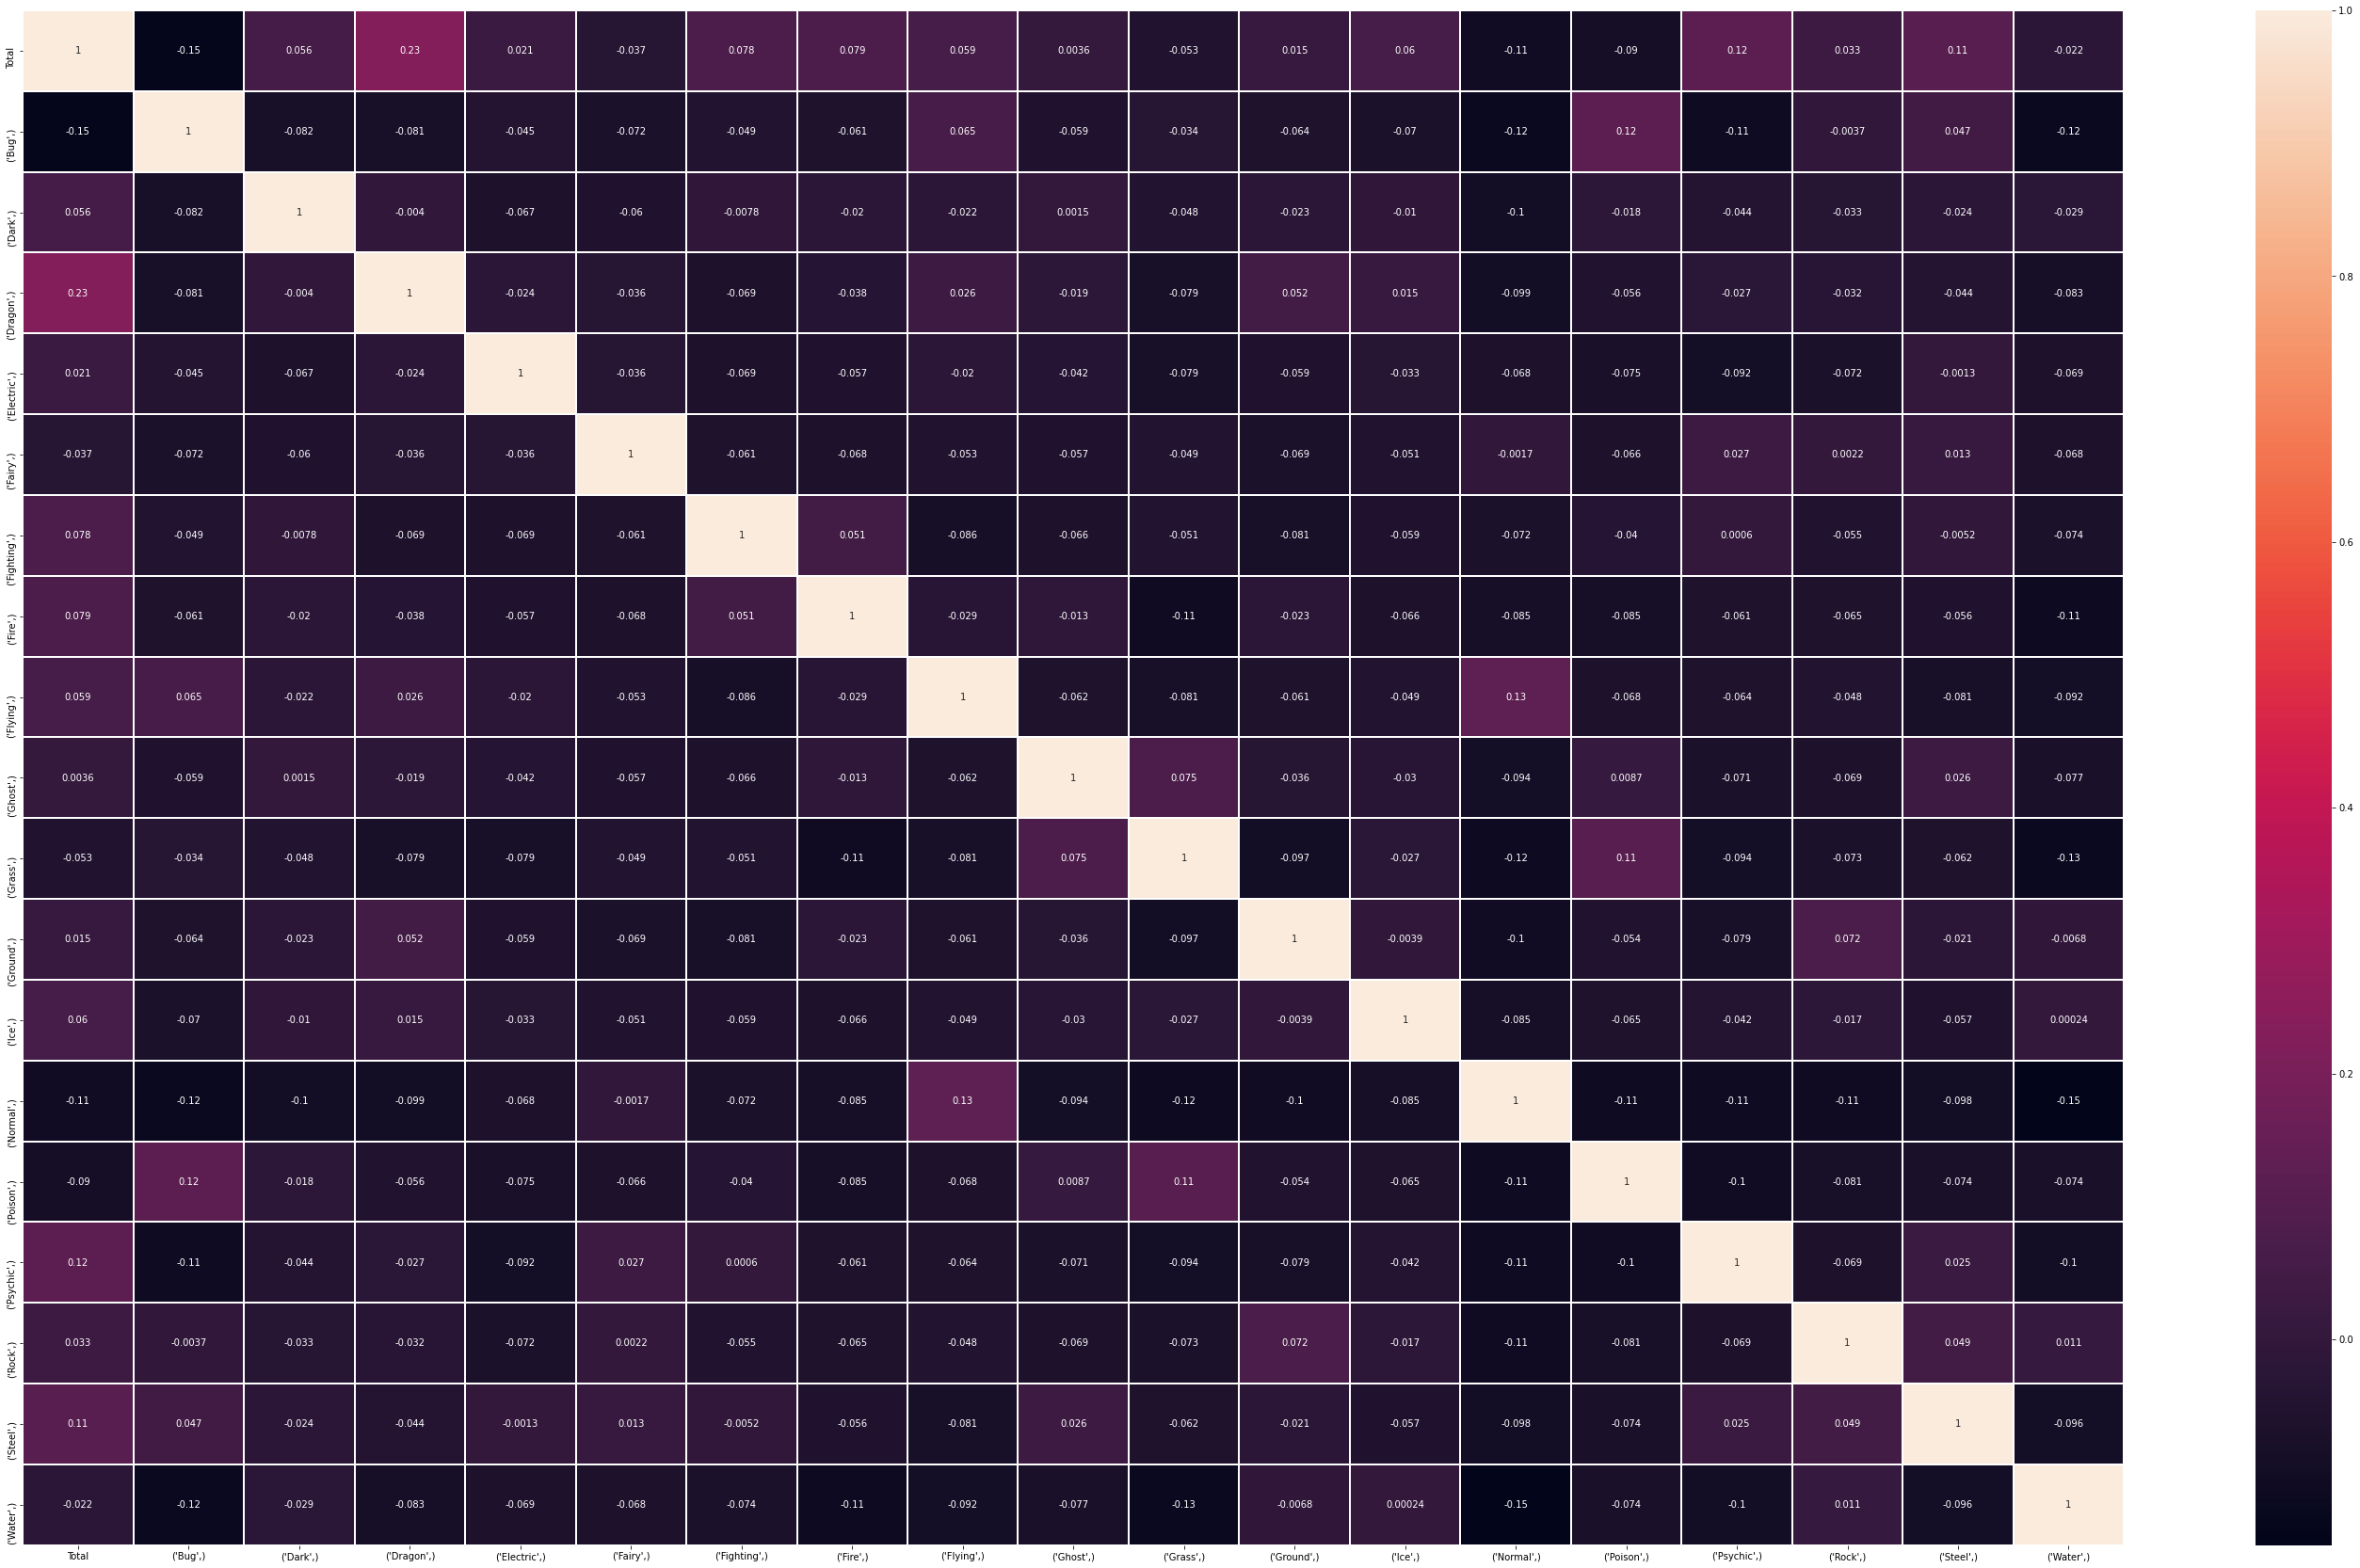

In [21]:
plt.figure(figsize = (50,30)) #reducing the size so it doesn't take forever to load again.
sns.heatmap(correlations_matrix,annot =True, linewidths =.10, data=corr_rel_norm_df)
plt.show()

**Finding:** Looks like Dragon with 0.23 is probably the best answer to our question. Let's see if we get the value numerically as well.

In [22]:
#ranking the correlations_matrix by using .sort_values

# Rank the correlations and identify the #1 pokemon type that is most likely to have the highest Total.
top_pokemon = pd.DataFrame(correlations_matrix['Total'].sort_values(ascending=False))
top_pokemon.head(2)
print("------")
print("Our top Pokemon type is: ")
display(top_pokemon.iloc[1])

,Total
Total,1.000000
"(Dragon,)",0.229705


------
Our top Pokemon type is: 


Total    0.229705
Name: (Dragon,), dtype: float64

**Conclusion:** What we noticed in the correlations matrix heatmap was correct, pokemon type 'Dragon' probably has the highest total.

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [32]:
#using pivot tables to see if we can find the best pokemon
pivot1 = pokemon.pivot_table(index=['Type 1','Type 2'],values='Total')
pivot1

Total
Type 1 Type 2              
Bug    Electric  395.500000
       Fighting  550.000000
       Fire      455.000000
       Flying    419.500000
       Ghost     236.000000
...                     ...
Water  Poison    426.666667
       Psychic   481.000000
       Rock      428.750000
       Steel     530.000000
       zero      413.745763

[154 rows x 1 columns]

In [25]:
#wasn't super helpful so trying with groupby()
grouped_max = pokemon.groupby(['Type 1','Type 2']).agg({'Total':'max'})
grouped_max.reset_index()

,Type 1,Type 2,Total
0,Bug,Electric,472
1,Bug,Fighting,600
2,Bug,Fire,550
3,Bug,Flying,600
4,Bug,Ghost,236
...,...,...,...
149,Water,Poison,515
150,Water,Psychic,590
151,Water,Rock,495
152,Water,Steel,530


In [33]:
# Sorting (descending) to get max value on top
top_2=grouped_max.sort_values(by=['Total'], ascending=False)
top_2.head(2)

,,Total
Type 1,Type 2,
Dragon,Flying,780
Psychic,Fighting,780


It's clear that we should choose either Dragon-Flying or Psychic-Fighting types combination. These combinations have the equal score so they could be regarded as a tie for top postion.